This file illustrates key data exploration concepts and techniques using a random client data set

In [1]:
#import packages
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
#create a random dataset
# Name, Job, Province, Age, Tenure, Rural Indicator
def create_random_dataset(num_rows=5000):
    """
    Creates a random dataset with specified columns.

    Args:
        num_rows: The number of rows in the dataset (default: 5000).

    Returns:
        A pandas DataFrame containing the random dataset.
    """

    names = [
        "Alice", "Bob", "Charlie", "David", "Emily", "Frank", "Grace", "Henry", "Isabella", "Jack",
        "Katherine", "Liam", "Mia", "Noah", "Olivia", "Peter", "Quinn", "Rachel", "Samuel", "Taylor",
        "Ursula", "Victor", "Wendy", "Xavier", "Yasmine", "Zachary",  # Add more names for variety
        "Sophia", "Jackson", "Ava", "Ethan", "Chloe", "Daniel", "Abigail", "Matthew", "Madison", "Alexander",
        "Ella", "Michael", "Avery", "James", "Scarlett", "Benjamin", "Sofia", "Elijah", "Camila", "Logan"
    ]
    
    # More variety for jobs
    jobs = [
        "Software Engineer", "Data Scientist", "Teacher", "Nurse", "Accountant", "Project Manager",
        "Marketing Specialist", "Sales Representative", "Chef", "Electrician", "Mechanic", "Construction Worker",
        "Doctor", "Lawyer", "Artist", "Musician", "Writer", "Journalist", "Web Developer", "Graphic Designer",
        "Data Analyst", "Business Analyst", "Financial Analyst", "HR Manager", "Recruiter", "Customer Service Rep",
        "Product Manager", "Operations Manager", "Research Scientist", "Pharmacist", "Physical Therapist", "Social Worker"
        , "Librarian", "Architect", "Civil Engineer", "Mechanical Engineer", "Electrical Engineer"
    ]

    provinces = [
        "Ontario", "Quebec", "British Columbia", "Alberta", "Manitoba", "Saskatchewan",
        "Nova Scotia", "New Brunswick", "Newfoundland and Labrador", "Prince Edward Island"
    ]


    data = []
    for _ in range(num_rows):
        name = random.choice(names) + " " + random.choice(names)  # Combine first and last names
        age = random.randint(18, 65)  # Realistic age range
        tenure = random.randint(0, min(age - 18, 30)) #Tenure cannot be longer than working life, limit to 30 for variety
        job = random.choice(jobs)
        province = random.choice(provinces)
        rural_indicator = random.choice(["Rural", "Urban"])

        data.append([name, age, tenure, job, province, rural_indicator])

    df = pd.DataFrame(data, columns=["Name", "Age", "Tenure", "Job", "Province", "Rural_Indicator"])
    return df


# --- Main program execution ---
if __name__ == "__main__":
    random_data = create_random_dataset()

In [4]:
#View Data Set
random_data

,Name,Age,Tenure,Job,Province,Rural_Indicator
0,Xavier Ella,43,17,HR Manager,Prince Edward Island,Rural
1,Jackson Olivia,34,3,Teacher,Nova Scotia,Rural
2,Noah Scarlett,27,4,Accountant,Alberta,Urban
3,Wendy Isabella,27,0,Project Manager,Quebec,Urban
4,Bob Xavier,33,14,Lawyer,Saskatchewan,Urban
...,...,...,...,...,...,...
4995,Isabella Avery,25,6,Teacher,Nova Scotia,Urban
4996,Logan Jackson,34,0,Data Analyst,Manitoba,Urban
4997,Xavier Ava,65,25,Accountant,Alberta,Rural
4998,Victor Avery,54,5,Sales Representative,Alberta,Urban


Univariate Analysis

Descriptive Statistics

In [ ]:
#The decribe commannd from Pandas calculates summary statistics like mean, min, max for numerical columns in data set
print("\nDescriptive Summary Statistics:")
print(random_data.describe())


Descriptive Statistics:
               Age       Tenure
count  5000.000000  5000.000000
mean     41.558200    10.287600
std      13.813992     8.605701
min      18.000000     0.000000
25%      30.000000     3.000000
50%      42.000000     8.000000
75%      53.000000    16.000000
max      65.000000    30.000000


In [ ]:
#Including the command include = object brings in columns with string or non numeric data as well
print("\nDescriptive Non Numeric Summary Statistics :")
print(random_data.describe(include='object'))

                  Name                   Job          Province Rural_Indicator
count             5000                  5000              5000            5000
unique            1930                    37                10               2
top     Jackson Sophia  Sales Representative  British Columbia           Urban
freq                 9                   159               551            2510


In [ ]:
#Get counts per value for a defined column
#ascending = true sets ascending order
print("\nValue Counts Column Ascending")
print(random_data['Age'].value_counts(ascending = True)) 


Values by Column Ascending
Age
54     87
36     93
33     93
40     93
37     95
26     95
41     95
29     96
58     96
22     96
61     98
18     98
65     98
62     99
59     99
32     99
19    100
47    101
53    102
45    103
55    104
64    104
25    104
28    105
20    105
48    105
34    106
42    106
46    106
60    107
52    107
27    107
31    108
24    108
57    109
30    109
38    109
44    110
35    110
21    112
50    113
63    113
23    114
51    114
49    115
43    115
39    116
56    123
Name: count, dtype: int64


In [ ]:
#Get values of a column shown as a percentage of column total
#use normalize = true to convert to percentage
print("\nValues As Percentage of Total Column Ascending")
print(random_data['Age'].value_counts(ascending = True,normalize = True)) 


Values Pertcentages by Column Ascending
Age
54    0.0174
36    0.0186
33    0.0186
40    0.0186
37    0.0190
26    0.0190
41    0.0190
29    0.0192
58    0.0192
22    0.0192
61    0.0196
18    0.0196
65    0.0196
62    0.0198
59    0.0198
32    0.0198
19    0.0200
47    0.0202
53    0.0204
45    0.0206
55    0.0208
64    0.0208
25    0.0208
28    0.0210
20    0.0210
48    0.0210
34    0.0212
42    0.0212
46    0.0212
60    0.0214
52    0.0214
27    0.0214
31    0.0216
24    0.0216
57    0.0218
30    0.0218
38    0.0218
44    0.0220
35    0.0220
21    0.0224
50    0.0226
63    0.0226
23    0.0228
51    0.0228
49    0.0230
43    0.0230
39    0.0232
56    0.0246
Name: proportion, dtype: float64


In [ ]:
#Get counts per value for multiple defined columns
#ascending = false sets descending order
for col in ['Age', 'Province']:  # List your categorical columns
    print(f"\nValue Counts for {col}:")
    print(random_data[col].value_counts(ascending = False))


Value Counts for Age:
Age
56    123
39    116
43    115
49    115
51    114
23    114
50    113
63    113
21    112
35    110
44    110
57    109
30    109
38    109
24    108
31    108
60    107
27    107
52    107
34    106
42    106
46    106
48    105
28    105
20    105
25    104
64    104
55    104
45    103
53    102
47    101
19    100
62     99
32     99
59     99
18     98
61     98
65     98
58     96
22     96
29     96
37     95
41     95
26     95
33     93
40     93
36     93
54     87
Name: count, dtype: int64

Value Counts for Province:
Province
British Columbia             551
Nova Scotia                  531
Ontario                      506
Prince Edward Island         502
Saskatchewan                 501
Alberta                      499
Manitoba                     492
Quebec                       479
Newfoundland and Labrador    470
New Brunswick                469
Name: count, dtype: int64


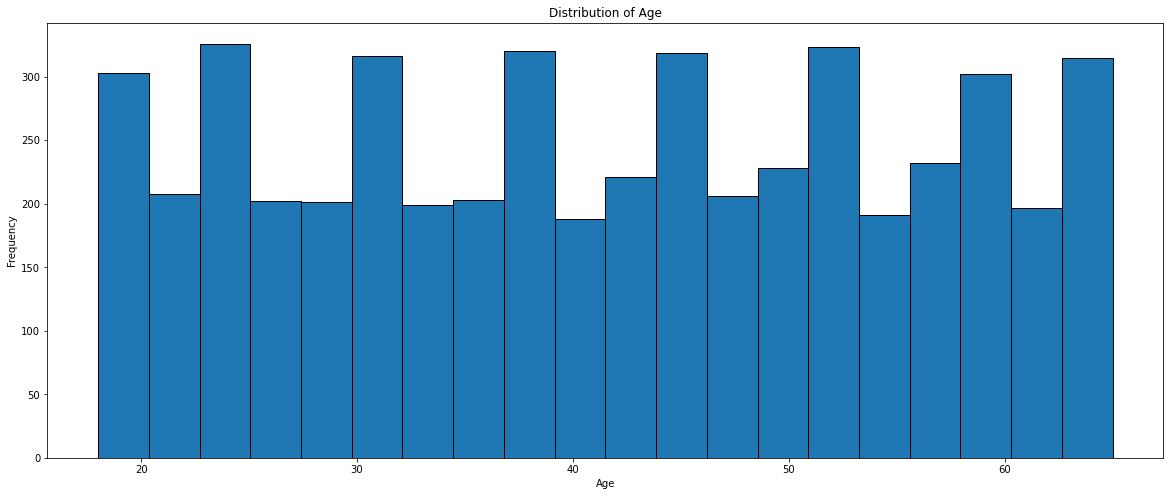

In [ ]:
#Histogram 
# to visualize the distrubtion of numerical data
#comes from matplotlib.pyplot library
#Define a number of bins to distribute the data
plt.figure(figsize=(20, 8))  # Adjust figure size
plt.hist(random_data['Age'], bins=20, edgecolor='black')  # 'bins' controls the number of bars
plt.xlabel('Age') #Define X axis label
plt.ylabel('Frequency') #define y axis label
plt.title('Distribution of Age') #define chart title
plt.show()

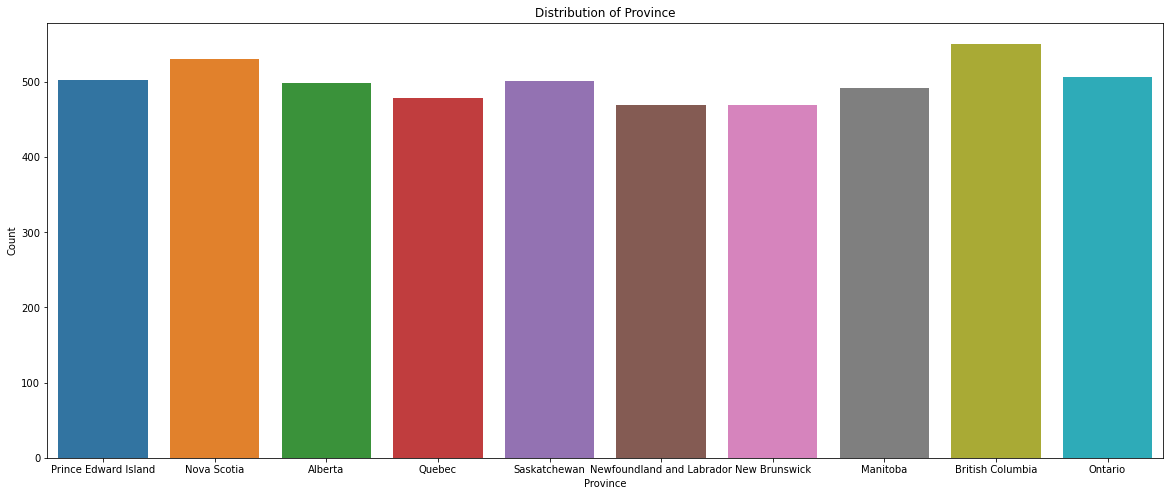

In [ ]:
#Bar Plots 
# to visualzie non numeric data
#this approach also leverages the seaborn library
plt.figure(figsize=(20, 8))
sns.countplot(x='Province', data=random_data) # Using Seaborn for a cleaner plot
plt.xlabel('Province')
plt.ylabel('Count')
plt.title('Distribution of Province')
plt.show()

<AxesSubplot:xlabel='Province'>

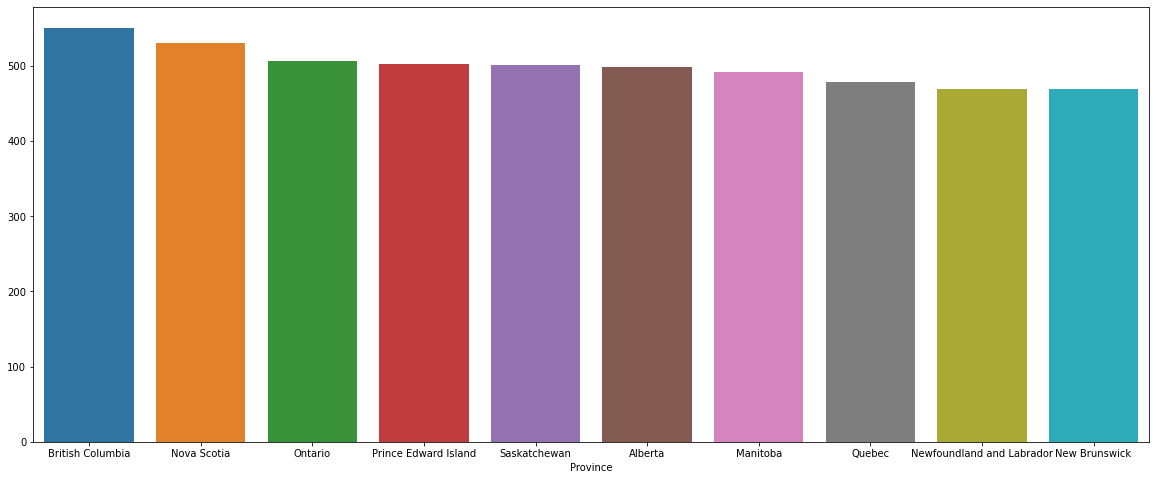

In [ ]:
#to sort a bar plot you need to pre process the data with pandas
category_counts = random_data['Province'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(20, 8))
sns.barplot(x=category_counts.index, y=category_counts.values)


In [ ]:
#best pratices for declaring variables if you want multiple visuals in 1 script

#create and define a figure and axis for your first chart
fig1, ax1 = plt.subplots(figsize = (20,10))

#use seaborn to define categorical axis, assign to ax1 define earlier
sns.countplot(x = 'Province', data = random_data, ax = ax1)

#set labels and title for chart1 using ax1
ax1.set_xlabel('Province')
ax1.set_ylabel('Count')
ax1.set_title('Distribution of Province')

#create and define a new figure and axis for your second chart
fig2, ax2 = plt.subplots(figsize = (50,10))

#use seaborn to define categorical axis, assign to ax2 define earlier
sns.countplot(x = 'Job', data = random_data, ax = ax2)

#set labels and title for chart2 using ax2
ax2.set_xlabel('Job')
ax2.set_ylabel('Count')
ax2.set_title('Distribution of Province')

#the show command will return both charts
plt.show()

Bivariate Analysis

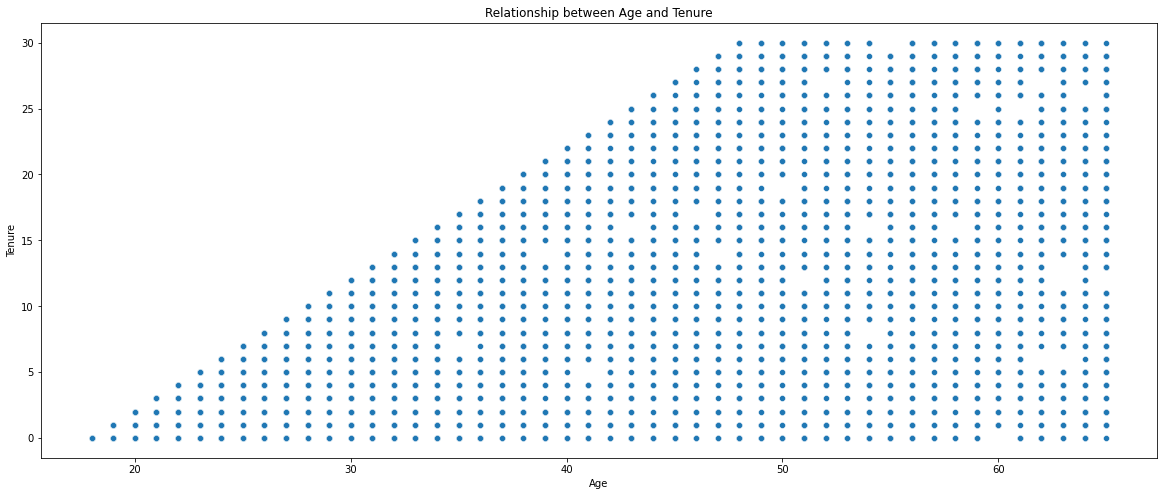

In [ ]:
# Scatter Plots
#Show relationship between two numeric fields
plt.figure(figsize=(20, 8))
sns.scatterplot(x='Age', y='Tenure', data=random_data)
plt.xlabel('Age')
plt.ylabel('Tenure')
plt.title('Relationship between Age and Tenure')
plt.show()

In [ ]:
#Correlation
#comes from pandas
#calcualtes the pairwise correlation coefficient 
# defaiult is Pearson correlation coefficient, the linear relationship
#one diagnoal view will always show 1
# the other value is what matters, a positive value means as one goes up so does the other, close to 1 the stronger the relatiosnhip
correlation = random_data[['Age', 'Tenure']].corr()
print(correlation)

           Age  Tenure
Age     1.0000  0.5632
Tenure  0.5632  1.0000


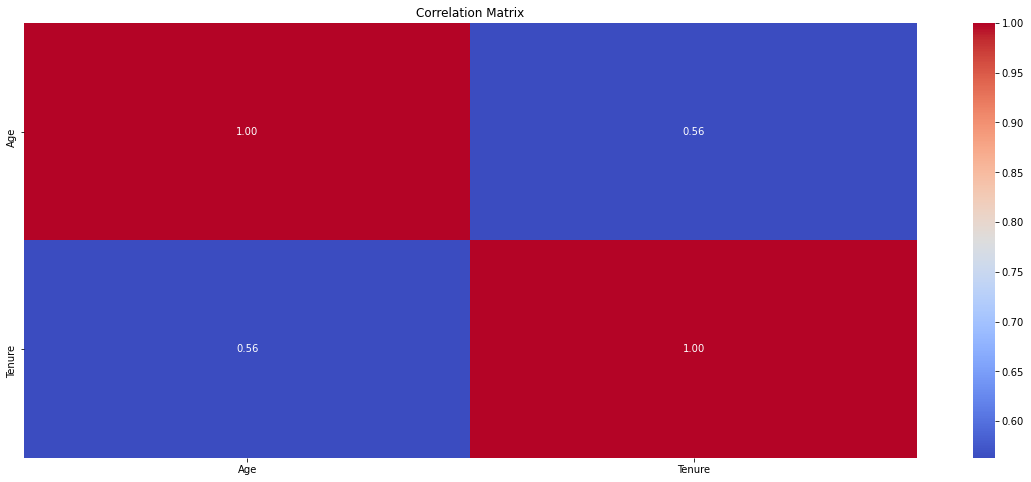

In [27]:
# Heatmap to plot correlation

# Calculate the correlation matrix
correlation_matrix = random_data.corr(numeric_only = True) # Only include numeric data

# Create the heatmap
plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
#Cross Tab
# Show value counts across two variables
cross_tab = pd.crosstab(random_data['Province'], random_data['Age'])
print(cross_tab)

Age                        18  19  20  21  22  23  24  25  26  27  ...  56  \
Province                                                           ...       
Alberta                     5  13  10  12   4  11  15  15  10  11  ...  15   
British Columbia           14   7  14   9   9  17  11  14  12  11  ...   7   
Manitoba                    8   9   9   8   8  18   7   9   3  11  ...  13   
New Brunswick              11   8   9  12   7  10   5   4  15  16  ...  15   
Newfoundland and Labrador   5  12   7  12   9  10  11   9   8  11  ...  10   
Nova Scotia                 9  13  15  10  12   3  11   6  10   8  ...  13   
Ontario                     8   9  14   6  15  11  10  19   7  11  ...  13   
Prince Edward Island       16  16  12  13  16   8  14  13  13  12  ...  17   
Quebec                     16   5   7  10   5  13  10   6   5  11  ...   8   
Saskatchewan                6   8   8  20  11  13  14   9  12   5  ...  12   

Age                        57  58  59  60  61  62  63  64  65  

In [ ]:
#Normalized Cross Tab
#show value percents aross two variables
cross_tab_norm = pd.crosstab(random_data['Province'], random_data['Age'], normalize='index') #normalize by index
print(cross_tab_norm)

Age                              18        19        20        21        22  \
Province                                                                      
Alberta                    0.010020  0.026052  0.020040  0.024048  0.008016   
British Columbia           0.025408  0.012704  0.025408  0.016334  0.016334   
Manitoba                   0.016260  0.018293  0.018293  0.016260  0.016260   
New Brunswick              0.023454  0.017058  0.019190  0.025586  0.014925   
Newfoundland and Labrador  0.010638  0.025532  0.014894  0.025532  0.019149   
Nova Scotia                0.016949  0.024482  0.028249  0.018832  0.022599   
Ontario                    0.015810  0.017787  0.027668  0.011858  0.029644   
Prince Edward Island       0.031873  0.031873  0.023904  0.025896  0.031873   
Quebec                     0.033403  0.010438  0.014614  0.020877  0.010438   
Saskatchewan               0.011976  0.015968  0.015968  0.039920  0.021956   

Age                              23        24      

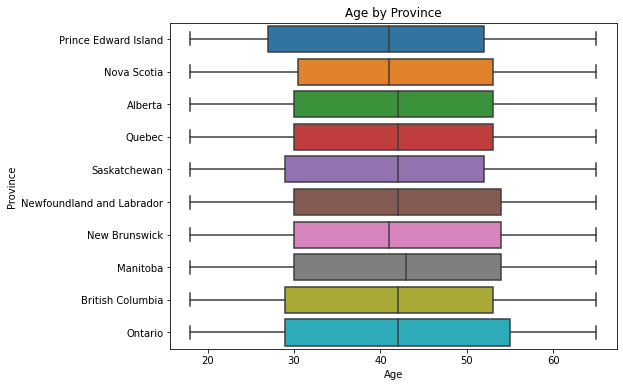

In [38]:
#Grouped Box Plots
plt.figure(figsize=(8, 6))
sns.boxplot(data=random_data, x='Age', y='Province')
plt.title('Age by Province')
plt.show()


Multivariate Analysis

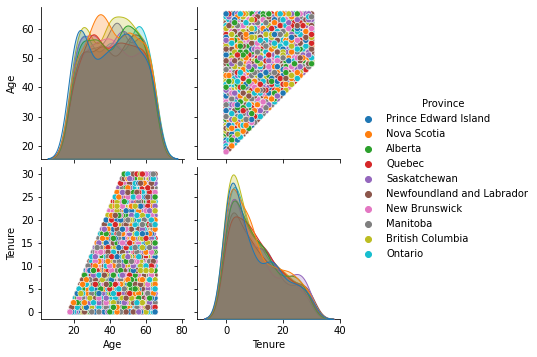

In [39]:
# Pair Plot (for numerical variables)
sns.pairplot(data=random_data, vars=['Age', 'Tenure'], hue='Province')
plt.show()